# Objective : Envelope Detection from the recorded audio

#### What??
##### Envelope refers to the small varying amplitude or magnitude of the signal at low frequency.

#### Why?
##### By detecting the envelope, we can extract the key features which is very crucial for estimating the lungs parameters.

#### How?
##### Approach 1: Using **Hilbert Transform (HT)** methodology to estimate the envelope of audio signals, we just take the positive envelope.

## Import dependcies


In [1]:
from scipy.signal import hilbert
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

### Sample audio data when microphone is at C3

In [2]:
# load the audio
# Audio_path = '/kaggle/input/audio-sample-data1/Sample_2_c3.wav'
# Audio_path = '/kaggle/input/audio-sample-data1/Sample_3_L3.wav'
Audio_path = '/kaggle/input/audio-sample-data1/Sample_4_R3.wav'
sample_rate, Audio_data = wavfile.read(Audio_path)

# Time vector
t = np.arange(len(Audio_data)) / sample_rate

#### Display plot of audio data sample


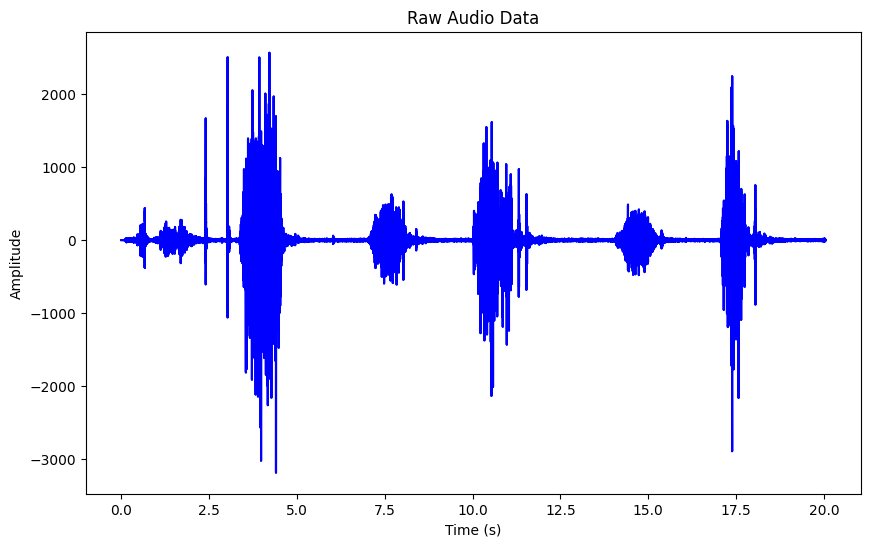

In [3]:
# plot the audio data sample
plt.figure(figsize=(10, 6))
plt.plot(t, Audio_data, label='Original Audio Signal', color='blue')
plt.title('Raw Audio Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### After Normalized Raw Audio Data

In [4]:
max_Amp = np.max(np.abs(Audio_data))
Normalized_audio_signal = Audio_data.astype(np.float32) / max_Amp

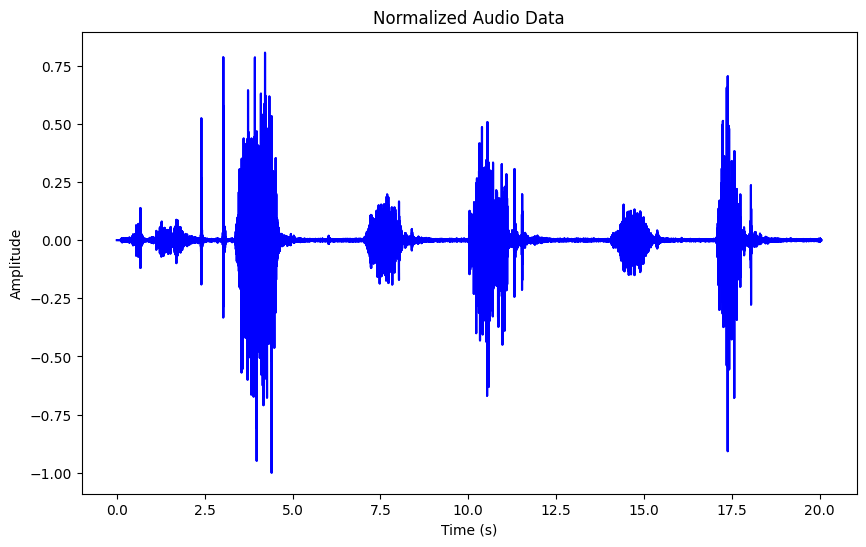

In [5]:
# plot the graph 
plt.figure(figsize=(10, 6))
plt.plot(t, Normalized_audio_signal, label='Normalized Audio Signal', color='blue')
plt.title('Normalized Audio Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### Apply Hilbert Transform on Normalized audio data to detect the envelope

In [6]:
hilbert_analytic_signal = hilbert(Normalized_audio_signal)
envelope = np.abs(hilbert_analytic_signal)
envelope.shape

(962560, 2)

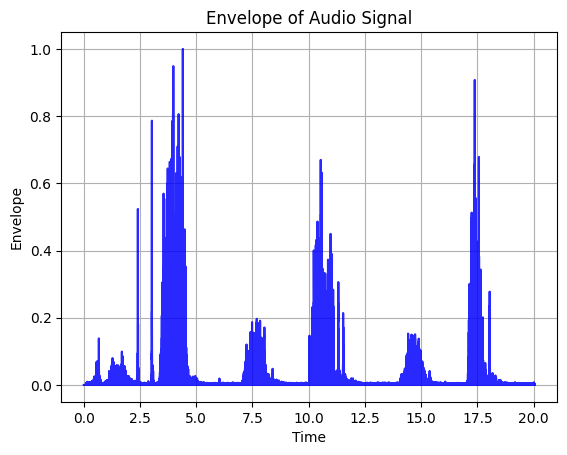

In [7]:
# plot the envelope signal
plt.plot(t, envelope, color='blue', alpha=0.6, linewidth=1.5)
plt.xlabel('Time')
plt.ylabel('Envelope')
plt.title('Envelope of Audio Signal')
plt.grid(True)
plt.show()

## Estimate the peak

In [8]:
# we used finds_peak method of scipy module
from scipy.signal import find_peaks
signal = Audio_data[:,0]
abs_sig = np.abs(signal)
peaks, _ = find_peaks(abs_sig, distance = sample_rate)

# calculate peak time
peak_time = peaks / sample_rate

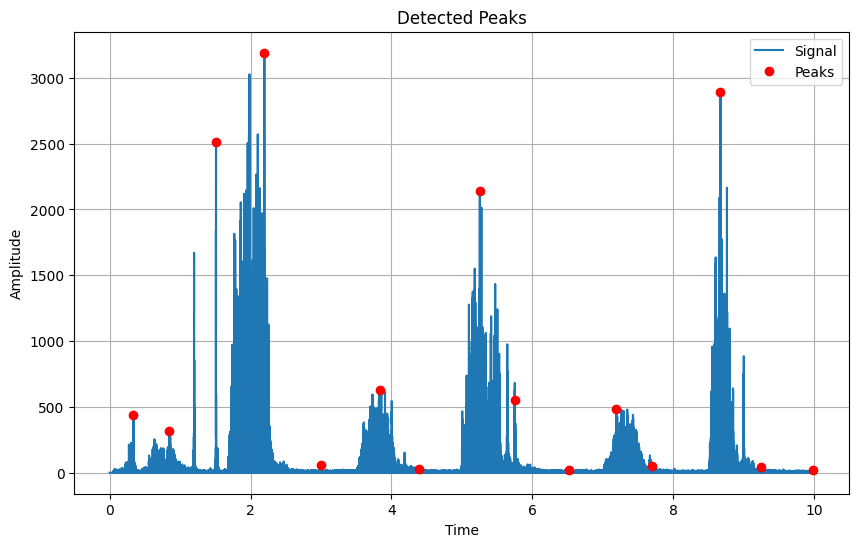

In [9]:
# Generate sample data
x = np.linspace(0, 10, len(abs_sig))

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(x, abs_sig, label='Signal')

# Plot peaks and valleys
plt.plot(x[peaks], abs_sig[peaks], 'ro', label='Peaks')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Detected Peaks')
plt.legend()

# Show plot
plt.grid(True)
plt.show()